In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from tqdm.notebook import tqdm
import seaborn as sns
import altair as alt
%matplotlib inline

In [2]:
fuzzy_clusters_df = pd.read_csv('../data/fuzzy_merge_df.csv')

In [3]:
fuzzy_clusters_df.head()

,Unnamed: 0,Cluster Name,Street_clusters,City_clusters,State_clusters,Facility Type,Cluster Start Date,# Cases,Latitude_clusters,Longitude_clusters,...,Latitude_violations,Longitude_violations,Accuracy Score_violations,Accuracy Type_violations,Number,Street_violations,City.1,State_violations,County_violations,Zip_violations
0,0,Trevecca Center for Rehab and Healing,329 Murfreesboro Pike,Nashville,TN,LTCF,4/4/20,102,36.144764,-86.755659,...,36.144764,-86.755659,1.0,rooftop,329,Murfreesboro Pike,Nashville,TN,Davidson County,37210
1,1,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093008,-86.845540,...,36.093008,-86.845540,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215
2,2,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093008,-86.845540,...,36.093008,-86.845540,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215
3,3,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093008,-86.845540,...,36.093008,-86.845540,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215
4,4,Montgomery Bell Academy job site,4001 Harding Pike,Nashville,TN,Construction,5/8/20,75,36.093008,-86.845540,...,36.093008,-86.845540,0.7,range_interpolation,4001,Harding Pl,Nashville,TN,Davidson County,37215


In [4]:
sters = pd.read_csv('../data/clusters_corrected-Sheet1-2_geocodio_d08379641999d429faecf949b19c4c6f08c2732c.csv')

In [5]:
fuzzy_clusters_df[fuzzy_clusters_df['Cluster Name'] == "Winner's"]

,Unnamed: 0,Cluster Name,Street_clusters,City_clusters,State_clusters,Facility Type,Cluster Start Date,# Cases,Latitude_clusters,Longitude_clusters,...,Latitude_violations,Longitude_violations,Accuracy Score_violations,Accuracy Type_violations,Number,Street_violations,City.1,State_violations,County_violations,Zip_violations
109,109,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
110,110,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
111,111,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
112,112,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
113,113,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
114,114,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
115,115,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
116,116,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
117,117,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203
118,118,Winner's,1913 Division St,Nashville,TN,Bar,6/26/20,10,36.149569,-86.796895,...,36.149569,-86.796895,1.0,rooftop,1913,Division St,Nashville,TN,Davidson County,37203


In [6]:
cluster_info = fuzzy_clusters_df.drop_duplicates(subset='Cluster Name', keep='first')
cluster_info = cluster_info.groupby(['Facility Type'])['# Cases'].agg(['nunique', 'sum', 'mean'])
cluster_info

,nunique,sum,mean
Facility Type,,,
Bar,5,109,18.166667
Church,1,10,10.000000
Congregate Living,3,213,71.000000
Construction,2,98,49.000000
Correctional Facility,3,338,112.666667
Gym,1,14,14.000000
LTCF,8,377,47.125000
Office,1,18,18.000000
Other,2,35,17.500000


In [7]:
fuzzy_clusters_df.groupby(['Cluster Name'])['# Cases'].mean()

Cluster Name
Ahava / Grace Healthcare of White's Creek         46
Belmont Village of Green Hills                    16
Dawghouse Saloon                                  14
Debra Johnson Rehab/TN Prison for Women          216
Dogwood                                           19
Good Samaritan Health & Healing                   75
Grand Hyatt Hotel (Power Design Inc) job site     23
Green Hills Center for Rehab and Healing          45
Hermitage Hall                                    93
Iron Tribe Belmont                                14
Kid Rock's Big Ass Honky Tonk                     15
Lakeshore Meadows                                 33
Life Care Center Old Hickory Village              11
Link Systems Electric                             12
Lois DeBerry Special Needs Facility               62
Loser's                                           29
Metro Water Services                              18
Miss Kelli's                                      14
Montgomery Bell Academy job site 

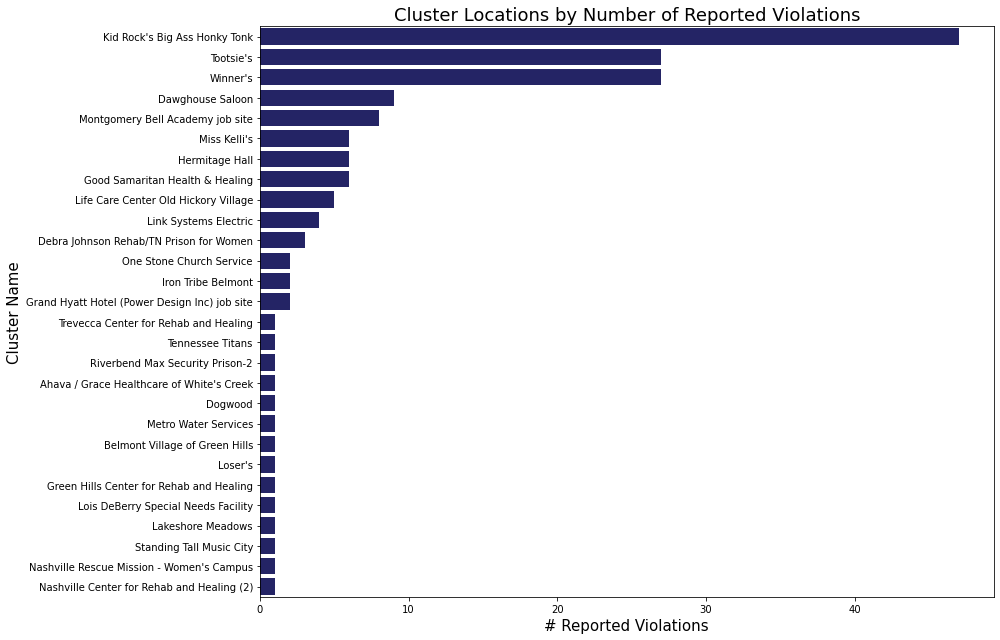

In [8]:
plt.figure(figsize=(14,9))
sns.countplot(y='Cluster Name', 
              data=fuzzy_clusters_df, 
              order = fuzzy_clusters_df['Cluster Name'].value_counts().index,
              color='midnightblue')
plt.xlabel('# Reported Violations', size=15)
plt.ylabel('Cluster Name', size=15)
plt.title('Cluster Locations by Number of Reported Violations', size=18);

plt.tight_layout()
plt.savefig('cluster_barplot_1.png', dpi=100)

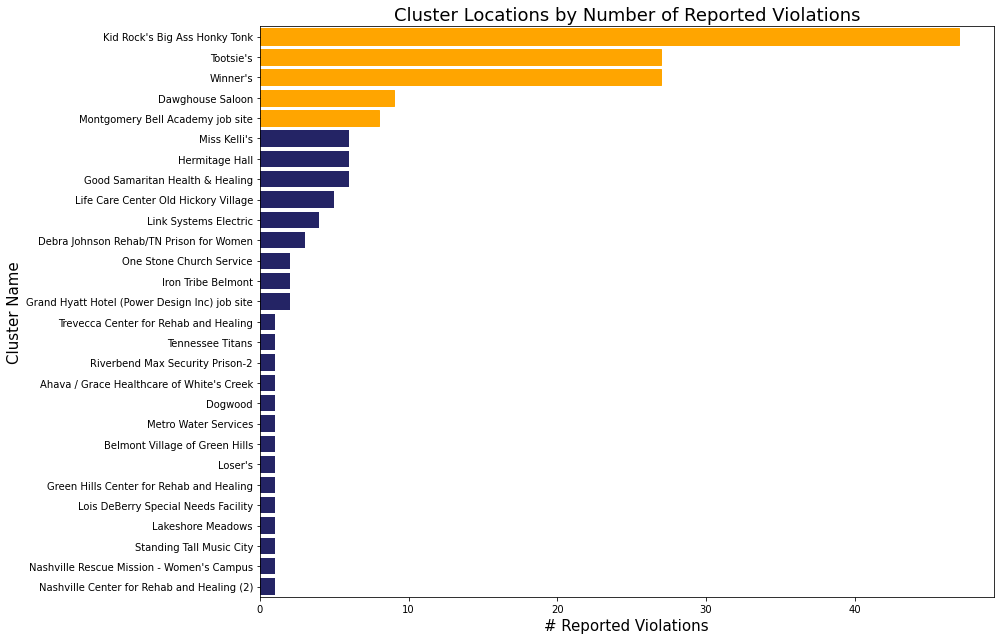

In [9]:
plt.figure(figsize=(14,9))
count_plot = sns.countplot(y='Cluster Name', 
              data=fuzzy_clusters_df, 
              order = fuzzy_clusters_df['Cluster Name'].value_counts().index,
              color="midnightblue")
plt.xlabel('# Reported Violations', size=15)
plt.ylabel('Cluster Name', size=15)
plt.title('Cluster Locations by Number of Reported Violations', size=18);

for bar in count_plot.patches:
    if bar.get_width() > 6:
        bar.set_color('orange')

count_plot;

plt.tight_layout()
#plt.savefig('cluster_barplot_2.png', dpi=100)

In [10]:
top_five_violations = fuzzy_clusters_df['Cluster Name'].value_counts().sort_values(
    ascending=False).head().index.to_list()
top_five_violations

["Kid Rock's Big Ass Honky Tonk",
 "Tootsie's",
 "Winner's",
 'Dawghouse Saloon',
 'Montgomery Bell Academy job site']

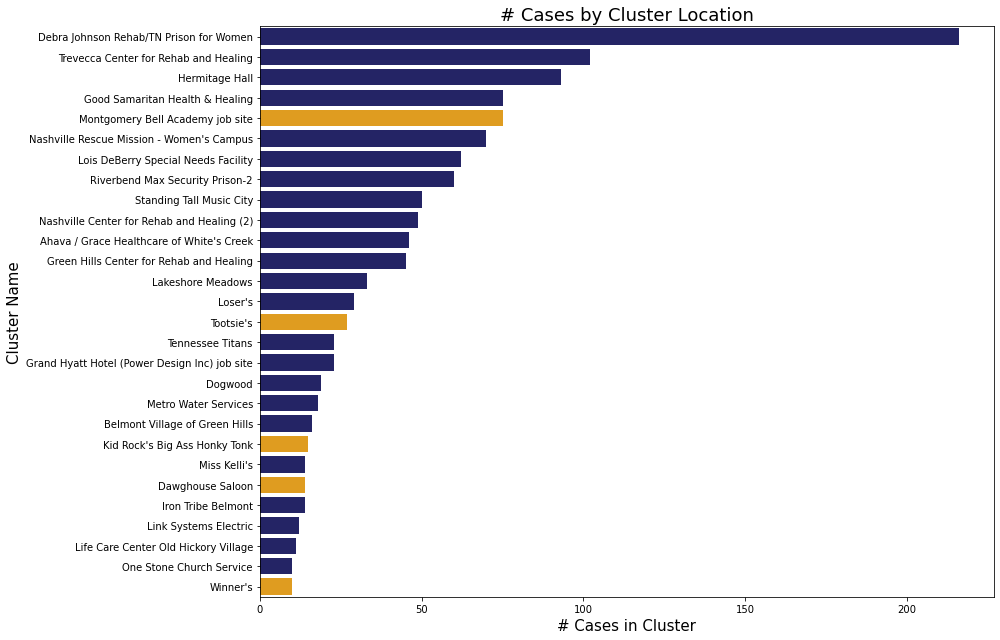

In [11]:
plt.figure(figsize=(14,9))
data=fuzzy_clusters_df.drop_duplicates(subset='Cluster Name', keep='first').sort_values('# Cases', ascending=False)
clrs = ['orange' if name in top_five_violations else 'midnightblue' for name in data['Cluster Name']]
bar_plot = sns.barplot(x='# Cases', y = 'Cluster Name',
              data=data, 
              palette=clrs)
plt.xlabel('# Cases in Cluster', size=15)
plt.ylabel('Cluster Name', size=15)
plt.title('# Cases by Cluster Location', size=18);

bar_plot;

plt.tight_layout()
#plt.savefig('cluster_barplot_3.png', dpi=100)

In [12]:
violations_top_10 = fuzzy_clusters_df['Cluster Name'].value_counts().head(10).index.to_list()

In [13]:
fuzzy_strip = fuzzy_clusters_df[fuzzy_clusters_df['Cluster Name'].isin(violations_top_10)]

In [14]:
fuzzy_strip['Date / Time Opened'] = pd.to_datetime(fuzzy_strip['Date / Time Opened'])
fuzzy_strip['Cluster Start Date'] = pd.to_datetime(fuzzy_strip['Cluster Start Date'])

<ipython-input-14-929db17d26b4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-929db17d26b4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
fuzzy_strip['Facility Type'].value_counts()

Bar                  116
LTCF                  11
Construction           8
Congregate Living      6
Other                  4
Name: Facility Type, dtype: int64

In [16]:
fuzzy_strip['Facility Type'] = fuzzy_strip['Facility Type'].map({
    'Bar': 'Bar',
    'Construction': 'Other Business',
    'Other': 'Other Business',
    'LTCF': 'LTCF/Living',
    'Congregate Living': 'LTCF/Living'})

<ipython-input-16-370dbb49c446>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
fuzzy_strip.T

,1,2,3,4,5,6,7,8,11,12,...,155,156,157,158,159,160,162,163,164,165
Unnamed: 0,1,2,3,4,5,6,7,8,11,12,...,155,156,157,158,159,160,162,163,164,165
Cluster Name,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Montgomery Bell Academy job site,Good Samaritan Health & Healing,Good Samaritan Health & Healing,...,Miss Kelli's,Miss Kelli's,Miss Kelli's,Miss Kelli's,Miss Kelli's,Miss Kelli's,Link Systems Electric,Link Systems Electric,Link Systems Electric,Link Systems Electric
Street_clusters,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,4001 Harding Pike,500 Hickory Hollow Terrace,500 Hickory Hollow Terrace,...,207 Printers Alley,207 Printers Alley,207 Printers Alley,207 Printers Alley,207 Printers Alley,207 Printers Alley,444 McNally Dr,444 McNally Dr,444 McNally Dr,444 McNally Dr
City_clusters,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Antioch,Antioch,...,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville,Nashville
State_clusters,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN,...,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN
Facility Type,Other Business,Other Business,Other Business,Other Business,Other Business,Other Business,Other Business,Other Business,LTCF/Living,LTCF/Living,...,Bar,Bar,Bar,Bar,Bar,Bar,Other Business,Other Business,Other Business,Other Business
Cluster Start Date,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-05-08 00:00:00,2020-06-03 00:00:00,2020-06-03 00:00:00,...,2020-10-01 00:00:00,2020-10-01 00:00:00,2020-10-01 00:00:00,2020-10-01 00:00:00,2020-10-01 00:00:00,2020-10-01 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00,2020-10-16 00:00:00
# Cases,75,75,75,75,75,75,75,75,75,75,...,14,14,14,14,14,14,12,12,12,12
Latitude_clusters,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.093,36.0524,36.0524,...,36.1639,36.1639,36.1639,36.1639,36.1639,36.1639,36.0926,36.0926,36.0926,36.0926
Longitude_clusters,-86.8455,-86.8455,-86.8455,-86.8455,-86.8455,-86.8455,-86.8455,-86.8455,-86.6483,-86.6483,...,-86.7785,-86.7785,-86.7785,-86.7785,-86.7785,-86.7785,-86.7403,-86.7403,-86.7403,-86.7403


In [18]:
violations_strip = alt.Chart(fuzzy_strip).mark_tick(opacity=.5, thickness=1.5).encode(
    x = alt.X('Date / Time Opened', axis = alt.Axis(
        title = 'Date of Violation Report (Blue) and Cluster Start Date (Red)', format = ("%B"), grid=False)),
    y = alt.Y('Cluster Name', axis = alt.Axis(title = 'Cluster Location', grid=True)),
    size=alt.value(38)
).properties(
    width=700,
    height=400,
    title='COVID-19 Clusters and Violation Reports over Time'
)

cluster_strip = alt.Chart(fuzzy_strip).mark_tick(thickness=2.5).encode(
    x="Cluster Start Date",
    y="Cluster Name",
    color=alt.value('red'),
    size=alt.value(38)
)

violations_strip + cluster_strip

alt.LayerChart(...)

In [19]:
violations_strip = alt.Chart(fuzzy_strip).mark_tick(opacity=.5, thickness=1.5).encode(
    x = alt.X('Date / Time Opened', axis = alt.Axis(
        title = 'Date of Violation Report and Cluster Start Date (Red)', format = ("%B"), grid=False)), color='Facility Type',
    y = alt.Y('Cluster Name', axis = alt.Axis(title = 'Cluster Location', grid=True)),
    size=alt.value(38)
).properties(
    width=700,
    height=400,
    title='COVID-19 Clusters and Violation Reports over Time'
)

cluster_strip = alt.Chart(fuzzy_strip).mark_tick(thickness=2.5).encode(
    x="Cluster Start Date",
    y="Cluster Name",
    color=alt.value('red'),
    size=alt.value(38)
)

violations_strip + cluster_strip

alt.LayerChart(...)